In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
data = pd.read_csv('../times.csv', names=['function', 'size', 'procs', 'time'], delimiter=';', skipinitialspace=True)

In [99]:
data['function'] = data.function.apply(lambda x: x.strip())
data['pf'] = data.function.str.cat(data.procs.astype(str))
data2 = data[['pf', 'size', 'time']]
data2 = data2[data2['size'] != 896].groupby(['size', 'pf']).agg({'time': 'mean'})
data2

/home/wojciech/personal/prace/code/ml/ml-venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/wojciech/personal/prace/code/ml/ml-venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


time
size pf                   
1    mm_par1.0    0.000138
     mm_par10.0   0.002866
     mm_par12.0   0.002823
     mm_par14.0   0.003537
     mm_par16.0   0.003105
     mm_par2.0    0.000368
     mm_par3.0    0.000608
     mm_par4.0    0.000727
     mm_par6.0    0.001209
     mm_par8.0    0.001652
     mm_seq1.0    0.000003
6    mm_par1.0    0.000055
     mm_par10.0   0.002948
     mm_par12.0   0.002482
     mm_par14.0   0.003167
     mm_par16.0   0.002791
     mm_par2.0    0.000257
     mm_par3.0    0.000459
     mm_par4.0    0.000576
     mm_par6.0    0.000973
     mm_par8.0    0.001296
     mm_seq1.0    0.000004
11   mm_par1.0    0.000053
     mm_par10.0   0.002198
     mm_par12.0   0.002381
     mm_par14.0   0.002890
     mm_par16.0   0.002667
     mm_par2.0    0.000245
     mm_par3.0    0.000421
     mm_par4.0    0.000468
...                    ...
991  mm_par14.0   1.267609
     mm_par16.0   1.157412
     mm_par2.0    6.298555
     mm_par3.0    4.881758
     mm_par4.0    4.355120
     mm_par6.0    3.014485
     mm_par8.0    2.239643
     mm_seq1.0   11.159907
996  mm_par1.0   11.680044
     mm_par10.0   1.904387
     mm_par12.0   1.474988
     mm_par14.0   1.340388
     mm_par16.0   1.198611
     mm_par2.0    6.398313
     mm_par3.0    4.937443
     mm_par4.0    4.454333
     mm_par6.0    3.092987
     mm_par8.0    2.304556
     mm_seq1.0   11.334493
1001 mm_par1.0   11.844655
     mm_par10.0   1.866507
     mm_par12.0   1.524816
     mm_par14.0   1.354587
     mm_par16.0   1.200706
     mm_par2.0    6.560860
     mm_par3.0    4.979384
     mm_par4.0    4.498788
     mm_par6.0    3.028738
     mm_par8.0    2.338389
     mm_seq1.0   11.498270

[2200 rows x 1 columns]

In [100]:
data3 = data2.unstack('pf')
data3

time                                                        \
pf    mm_par1.0 mm_par10.0 mm_par12.0 mm_par14.0 mm_par16.0 mm_par2.0   
size                                                                    
1      0.000138   0.002866   0.002823   0.003537   0.003105  0.000368   
6      0.000055   0.002948   0.002482   0.003167   0.002791  0.000257   
11     0.000053   0.002198   0.002381   0.002890   0.002667  0.000245   
16     0.000090   0.003424   0.002205   0.002858   0.002600  0.000258   
21     0.000130   0.002121   0.002249   0.002655   0.002512  0.000302   
26     0.000229   0.002074   0.002175   0.002578   0.002455  0.000345   
31     0.000356   0.002718   0.002107   0.002451   0.002436  0.000380   
36     0.000542   0.002685   0.002048   0.002444   0.002413  0.000462   
41     0.000754   0.002560   0.002073   0.002474   0.002360  0.000601   
46     0.001064   0.002593   0.002097   0.002500   0.002423  0.000776   
51     0.001419   0.002517   0.002288   0.002482   0.002431  0.000963   
56     0.001907   0.002609   0.002329   0.002495   0.003890  0.001197   
61     0.002417   0.002677   0.002505   0.003201   0.004171  0.001503   
66     0.003129   0.003030   0.002599   0.002823   0.002579  0.001879   
71     0.003958   0.003556   0.002557   0.002764   0.002573  0.002318   
76     0.004930   0.003718   0.002727   0.002929   0.002626  0.002867   
81     0.005951   0.004628   0.003184   0.003029   0.002824  0.003474   
86     0.007063   0.004974   0.004021   0.003138   0.002820  0.004029   
91     0.008322   0.003157   0.003193   0.003217   0.002910  0.004918   
96     0.009816   0.004418   0.003505   0.003428   0.002966  0.005655   
101    0.011316   0.003824   0.004020   0.003657   0.003181  0.006458   
106    0.013225   0.004158   0.003783   0.004688   0.003239  0.007506   
111    0.015363   0.007547   0.004037   0.004362   0.003319  0.008597   
116    0.017247   0.005208   0.004573   0.004294   0.003638  0.009731   
121    0.019008   0.008899   0.005664   0.004788   0.003829  0.011116   
126    0.021529   0.010129   0.004899   0.005371   0.003867  0.011969   
131    0.024100   0.010452   0.005128   0.005732   0.004181  0.013464   
136    0.026916   0.008789   0.005881   0.005438   0.004398  0.015382   
141    0.030588   0.007919   0.005918   0.005725   0.004640  0.016971   
146    0.033679   0.008507   0.009932   0.006230   0.005121  0.018334   
...         ...        ...        ...        ...        ...       ...   
851    7.178752   1.109506   0.911056   0.828455   0.754104  3.956403   
856    7.323259   1.119894   0.948513   0.829748   0.735843  4.023599   
861    7.455978   1.203712   0.998228   0.846035   0.787173  4.088122   
866    7.584779   1.245042   1.009861   0.860097   0.790465  4.162613   
871    7.716936   1.236067   1.005047   0.879961   0.774871  4.241756   
876    7.886157   1.224216   1.008120   0.902967   0.806405  4.308182   
881    7.993623   1.276393   1.030389   0.903264   0.845670  4.425234   
886    8.117026   1.272086   1.071991   0.931253   0.864499  4.411104   
891    8.530172   1.320040   1.091579   0.905373   0.753511  4.569484   
901    8.668031   1.334662   1.108866   0.960472   0.846072  4.728633   
906    8.688185   1.406100   1.126656   0.974859   0.899370  4.766286   
911    8.869026   1.403467   1.241612   1.018412   0.910012  4.877861   
916    9.038342   1.407520   1.213579   1.011151   0.917324  4.920594   
921    9.167945   1.458445   1.189253   1.038943   0.956263  5.003291   
926    9.322973   1.436734   1.251008   1.072548   0.996993  5.131580   
931    9.478152   1.532850   1.274557   1.064687   0.998293  5.255625   
936    9.611500   1.556809   1.238559   1.097792   0.979517  5.295012   
941    9.788808   1.567704   1.301347   1.104240   0.997144  5.414633   
946    9.962012   1.588713   1.273961   1.121575   1.020452  5.518602   
951   10.132020   1.559186   1.331866   1.095095   1.040059  5.565861   
956   10.311639   1.668531   1.292352   1.129054   1.029678  5.640069

In [101]:
data3.columns = data3.columns.get_level_values(1)

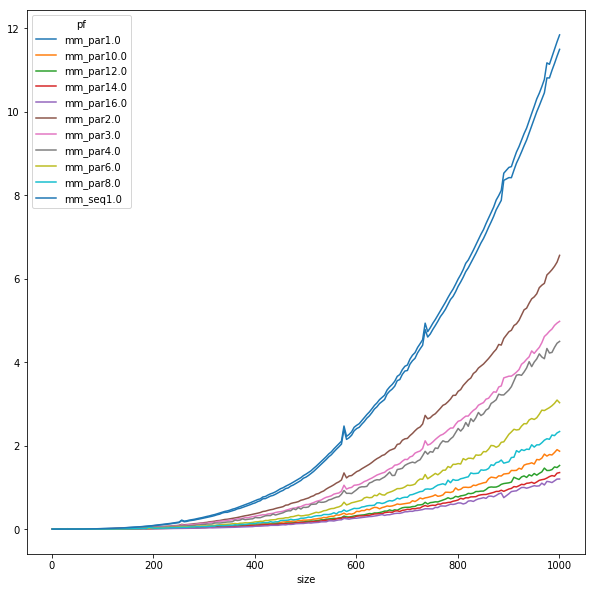

In [105]:
#data3[(data3.index > 877) & (data3.index < 914)].plot(figsize=(10,10))
data3.plot(figsize=(10,10))
#plt.savefig("mm.png")
plt.show()

In [87]:
data4 = data3.stack()

In [88]:
data4 = data2
data4['time'] = np.cbrt(data4.time)
data4

time
size pf                
1    mm_par1   0.051676
     mm_par10  0.142045
     mm_par12  0.141331
     mm_par14  0.152370
     mm_par16  0.145888
     mm_par2   0.071661
     mm_par3   0.084716
     mm_par4   0.089918
     mm_par6   0.106531
     mm_par8   0.118214
     mm_seq1   0.015874
6    mm_par1   0.038030
     mm_par10  0.143395
     mm_par12  0.135394
     mm_par14  0.146845
     mm_par16  0.140803
     mm_par2   0.063579
     mm_par3   0.077138
     mm_par4   0.083203
     mm_par6   0.099092
     mm_par8   0.109027
     mm_seq1   0.017419
11   mm_par1   0.037563
     mm_par10  0.130020
     mm_par12  0.133532
     mm_par14  0.142448
     mm_par16  0.138678
     mm_par2   0.062573
     mm_par3   0.074948
     mm_par4   0.077639
...                 ...
991  mm_par14  1.082252
     mm_par16  1.049936
     mm_par2   1.846774
     mm_par3   1.696389
     mm_par4   1.633052
     mm_par6   1.444567
     mm_par8   1.308357
     mm_seq1   2.453530
996  mm_par1   2.268897
     mm_par10  1.239515
     mm_par12  1.138316
     mm_par14  1.102580
     mm_par16  1.062249
     mm_par2   1.856472
     mm_par3   1.702815
     mm_par4   1.645360
     mm_par6   1.456999
     mm_par8   1.320877
     mm_seq1   2.461011
1001 mm_par1   2.279506
     mm_par10  1.231241
     mm_par12  1.150992
     mm_par14  1.106460
     mm_par16  1.062867
     mm_par2   1.872062
     mm_par3   1.707623
     mm_par4   1.650815
     mm_par6   1.446840
     mm_par8   1.327310
     mm_seq1   2.480966

[2200 rows x 1 columns]

In [89]:
data5 = data4.unstack('pf')
data5.columns = data5.columns.get_level_values(1)

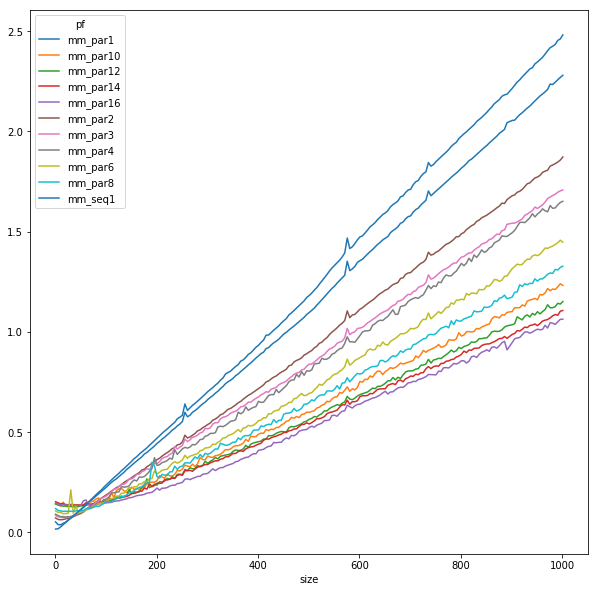

In [90]:
data5.plot(figsize=(10,10))
plt.show()

In [91]:
data6 = data
data6

,function,size,procs,time,pf
0,mm_seq,1,1,0.000003,mm_seq1
1,mm_par,1,16,0.003100,mm_par16
2,mm_seq,6,1,0.000005,mm_seq1
3,mm_par,6,16,0.002811,mm_par16
4,mm_seq,11,1,0.000016,mm_seq1
5,mm_par,11,16,0.002640,mm_par16
6,mm_seq,16,1,0.000044,mm_seq1
7,mm_par,16,16,0.002619,mm_par16
8,mm_seq,21,1,0.000094,mm_seq1
9,mm_par,21,16,0.002547,mm_par16


In [92]:
# #for i in data6.index:
# print(data6.size.astype(int))
# for i in range(data6.size.astype(int)):
#     if data6.iloc[i]['function'] == "mm_seq":
#         data6.iloc[i]['procs'] = data6.iloc[i + 1]['procs'] 

In [93]:
data6

,function,size,procs,time,pf
0,mm_seq,1,1,0.000003,mm_seq1
1,mm_par,1,16,0.003100,mm_par16
2,mm_seq,6,1,0.000005,mm_seq1
3,mm_par,6,16,0.002811,mm_par16
4,mm_seq,11,1,0.000016,mm_seq1
5,mm_par,11,16,0.002640,mm_par16
6,mm_seq,16,1,0.000044,mm_seq1
7,mm_par,16,16,0.002619,mm_par16
8,mm_seq,21,1,0.000094,mm_seq1
9,mm_par,21,16,0.002547,mm_par16


In [94]:
data7 = data
data7

,function,size,procs,time,pf
0,mm_seq,1,1,0.000003,mm_seq1
1,mm_par,1,16,0.003100,mm_par16
2,mm_seq,6,1,0.000005,mm_seq1
3,mm_par,6,16,0.002811,mm_par16
4,mm_seq,11,1,0.000016,mm_seq1
5,mm_par,11,16,0.002640,mm_par16
6,mm_seq,16,1,0.000044,mm_seq1
7,mm_par,16,16,0.002619,mm_par16
8,mm_seq,21,1,0.000094,mm_seq1
9,mm_par,21,16,0.002547,mm_par16


In [95]:
data7['n_procs'] = data7['procs'].shift(-1)

In [96]:
data7.loc[data7.function == 'mm_seq', 'procs'] = data7.n_procs

In [97]:
data = data7[(data7.function != 'mm_seq') | (data7.procs == 1)]

In [98]:
data7['pf'] = data7.function.str.cat(data.procs.astype(str))
data8 = data7[(data7.function == 'mm_seq') &  (data7['size'] != 896)][['pf', 'size', 'time']]
data8 = data8.groupby(['size', 'pf']).agg({'time': 'mean'})
data8

ValueError: All arrays must be same length

In [ ]:
data9 = data8.unstack('pf')
data9.columns = data9.columns.get_level_values(1)
data9.plot(figsize = (15,15))
plt.savefig("mm_seq.png", dpi=300)
plt.show()